# SRCNN

## Training the model

Import our helper classes and functions

In [1]:
from data_loader import MultipleDataLoader
from train import SRGANTrainer, SRCNNTrainer, SR_UNETTrainer, Losses, predict_and_show

import tensorflow as tf

## Define the dataloader

In [3]:
lr_channels = 5
data_dir = "DataTFRecords/train/"
repeat = True
augment = True
shuffle =  True
batch_size = 8

loader = MultipleDataLoader(data_dir, batch_size, repeat, augment, shuffle, lr_channels)

## Define training parameters and model structure for the trainer

In [5]:
srcnn_training_hyperparams = {
    'losses': [Losses.cMSE, Losses.SSIM],
    'losses_weights': [5.0, 1.0],
    'epochs': 30,
    'optimizer': tf.keras.optimizers.Adam(0.0001),
    'verbose': True,
    #'model_path': "Model/SRCNN/10.hdf5" # reloading model
}

srcnn_model_parameters = {
    'channel_dim': 5,
    'number_residual_block': 10,
    'batch_norm': False,
}

trainer = SRCNNTrainer(srcnn_training_hyperparams, srcnn_model_parameters)

Creating new model, saving at "Model/SRCNN/" 


## Train the model on the data using the loader

In [6]:
trainer.fit(loader)

Starting model training
Epoch 1/30
145/145 [==============================] - 229s 2s/step - loss: 0.3222 - cPSNR_metric: 23.9048
Epoch 2/30
145/145 [==============================] - 219s 2s/step - loss: 0.0362 - cPSNR_metric: 35.9907
Epoch 3/30
145/145 [==============================] - 219s 2s/step - loss: 0.0344 - cPSNR_metric: 37.6152
Epoch 4/30
145/145 [==============================] - 219s 2s/step - loss: 0.0252 - cPSNR_metric: 39.6501
Epoch 5/30
145/145 [==============================] - 219s 2s/step - loss: 0.0247 - cPSNR_metric: 40.1413
Epoch 6/30
145/145 [==============================] - 219s 2s/step - loss: 0.0276 - cPSNR_metric: 39.1420
Epoch 7/30
145/145 [==============================] - 218s 2s/step - loss: 0.0270 - cPSNR_metric: 39.5937
Epoch 8/30
145/145 [==============================] - 218s 2s/step - loss: 0.0233 - cPSNR_metric: 40.6188
Epoch 9/30
145/145 [==============================] - 218s 2s/step - loss: 0.0231 - cPSNR_metric: 40.6588
Epoch 10/30
145/145 [=

## Compute some predictions including augmentations

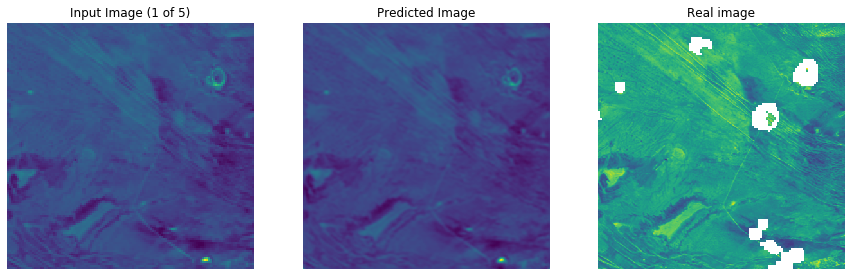

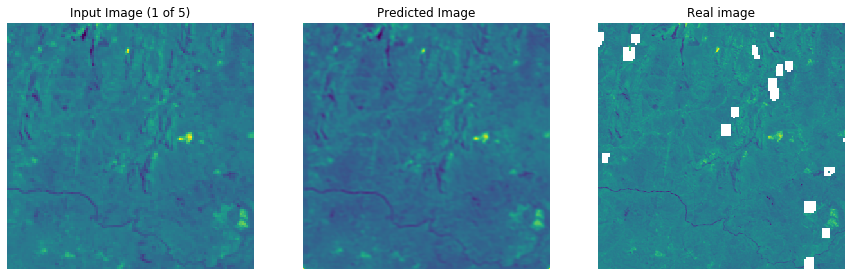

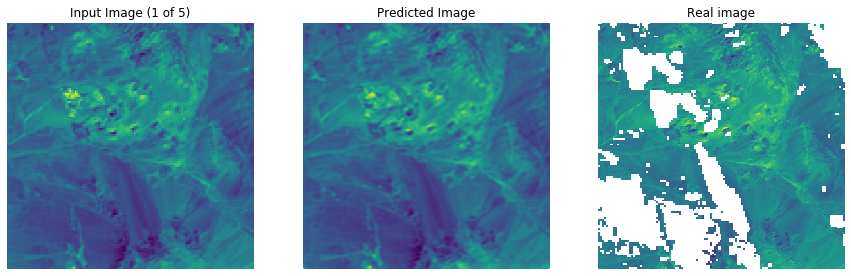

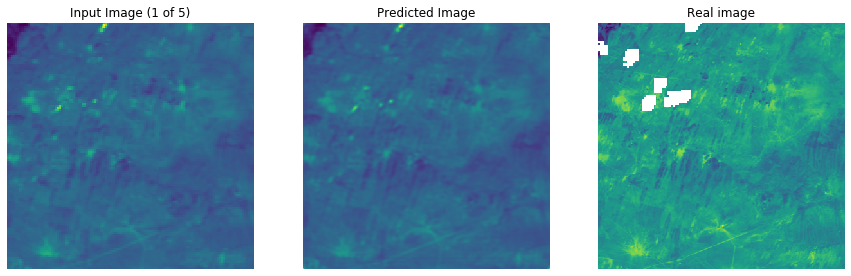

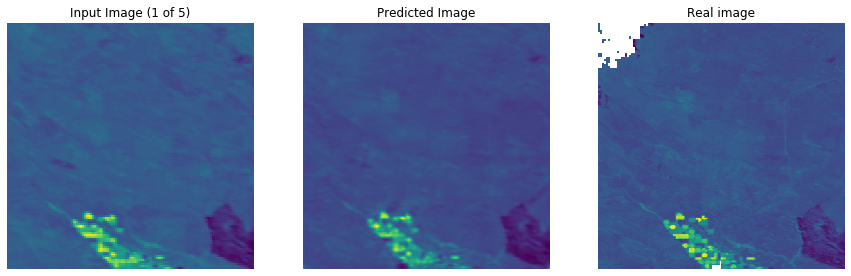

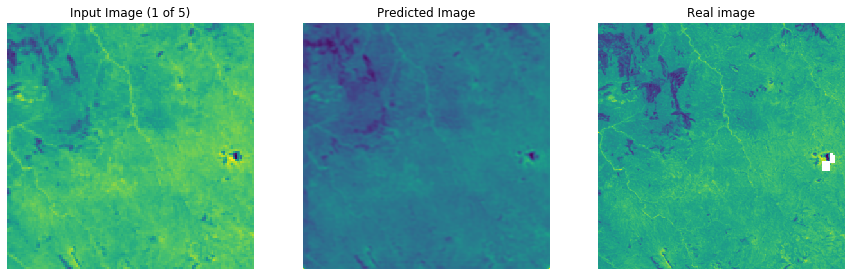

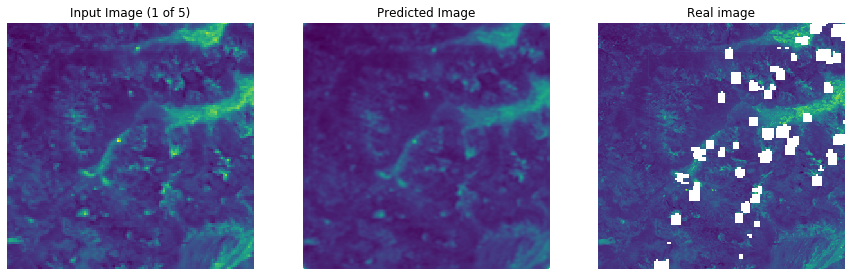

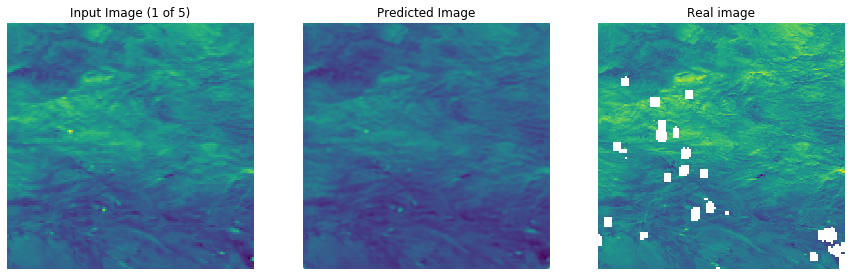

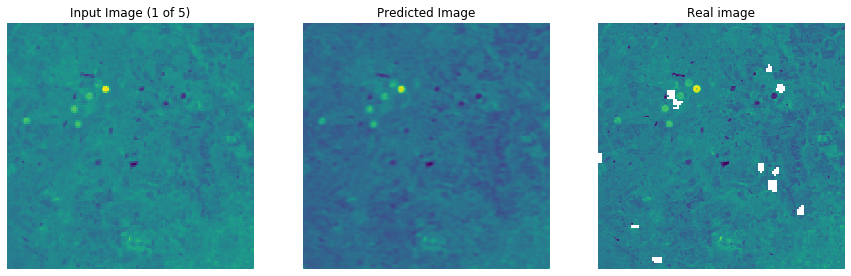

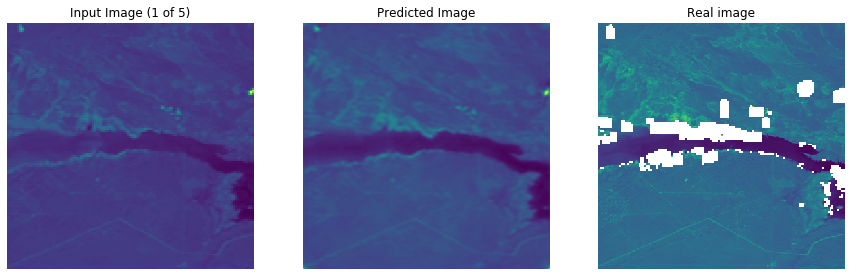

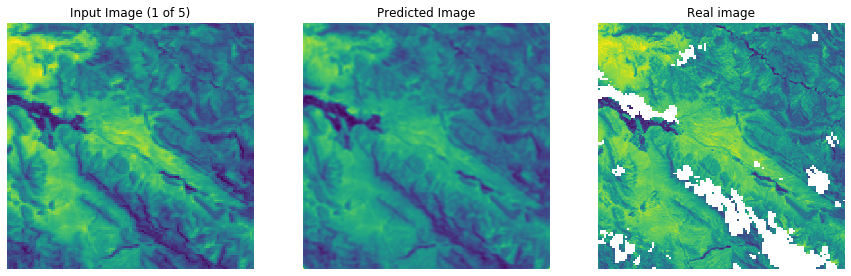

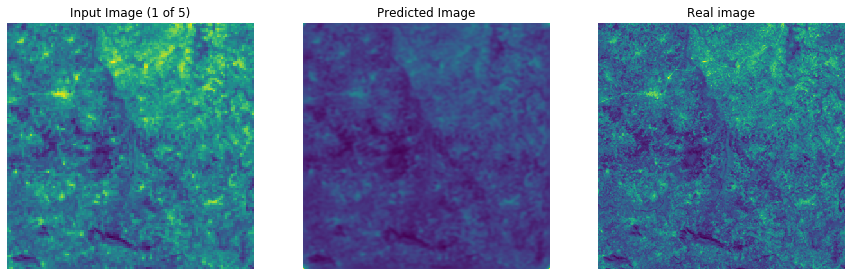

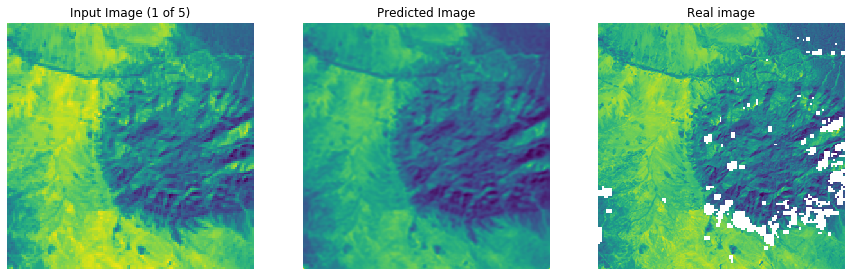

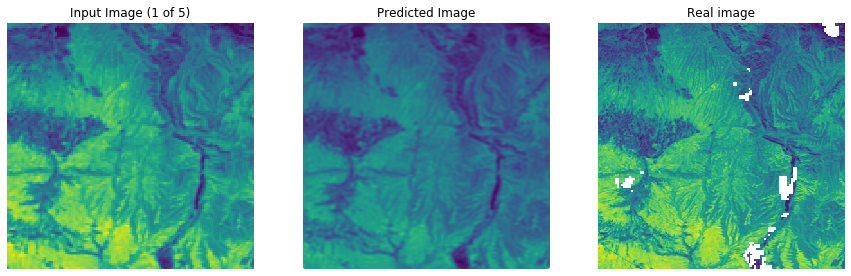

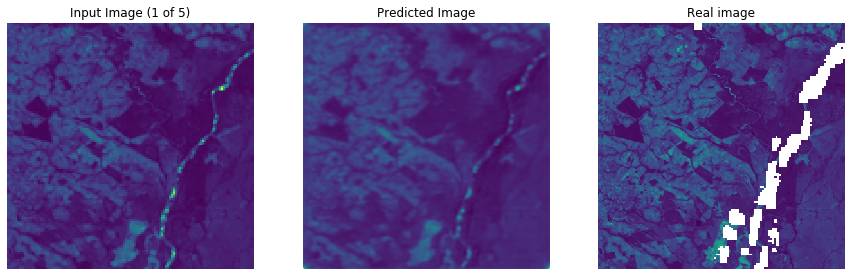

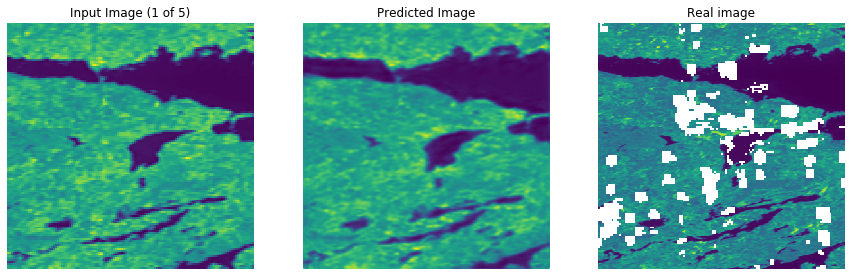

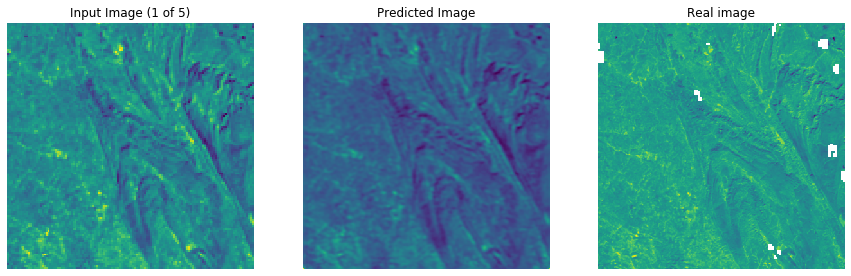

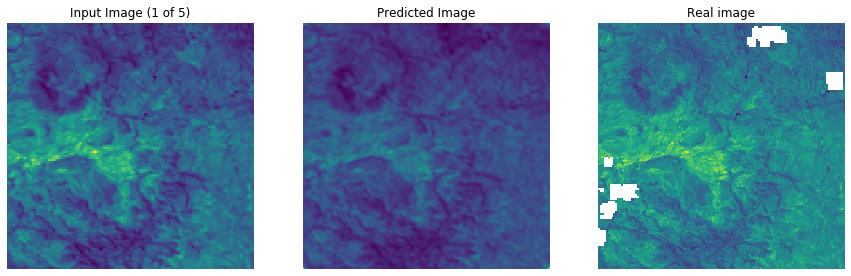

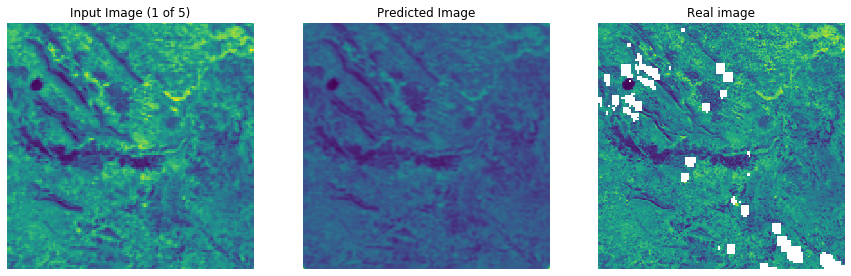

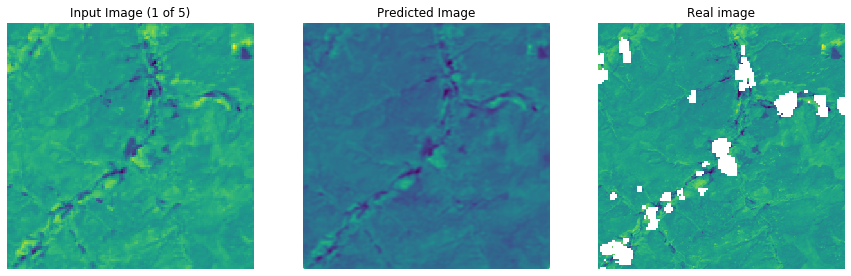

In [7]:
for lrs, hr in loader().take(20):
    predict_and_show(trainer.model, lrs, hr, max_lr=5)

## Compute score using script

In [4]:
! python score.py --model_path Model/SRCNN/30.hdf5 --data_path DataTFRecords/train/ --num_channel 5

Super resolving with Model/SRCNN/30.hdf5
score: 1.0243824076485544


## U-NET

In [2]:
lr_channels = 5
data_dir = "DataTFRecords/train/"
repeat = True
augment = True
shuffle =  True
batch_size = 8

loader = MultipleDataLoader(data_dir, batch_size, repeat, augment, shuffle, lr_channels)

In [3]:
srunet_training_hyperparams = {
    'losses': [Losses.cMSE, Losses.SSIM],
    'losses_weights': [5.0, 1.0],
    'epochs': 30,
    'optimizer': tf.keras.optimizers.Adam(0.0001),
    'verbose': True,
    #'model_path': "Model/SRCNN/10.hdf5" # reloading model
}

srunet_model_parameters = {
    'channel_dim': 5,
    'batch_norm': False,
}

trainer = SR_UNETTrainer(srunet_training_hyperparams, srunet_model_parameters)

Creating new model, saving at "Model/SR_UNET/" 


In [ ]:
trainer.fit(loader)

Starting model training
Epoch 1/30


W0721 17:49:48.779046 140284746094400 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


145/145 [==============================] - 229s 2s/step - loss: 0.8257 - cPSNR_metric: 25.0409
Epoch 2/30
145/145 [==============================] - 219s 2s/step - loss: 0.1363 - cPSNR_metric: 29.0919
Epoch 3/30
145/145 [==============================] - 221s 2s/step - loss: 0.0327 - cPSNR_metric: 36.9499
Epoch 4/30
145/145 [==============================] - 220s 2s/step - loss: 0.0300 - cPSNR_metric: 38.2621
Epoch 5/30
145/145 [==============================] - 220s 2s/step - loss: 0.0323 - cPSNR_metric: 38.3320
Epoch 6/30
145/145 [==============================] - 226s 2s/step - loss: 0.0254 - cPSNR_metric: 39.8724
Epoch 7/30
123/145 [========================>.....] - ETA: 33s - loss: 0.0251 - cPSNR_metric: 39.9869

# Train SRGAN

In [4]:
loader = MultipleDataLoader("DataTFRecords/train/", 4, False, True, True, 5)

In [5]:
srgan_training_hyperparams = {
    'losses': [Losses.cMSE, Losses.MS_SSIM],
    'losses_weights': [0.8, 0.2],
    'epochs': 25,
    'optimizer_gen': tf.keras.optimizers.Adam(0.0001),
    'optimizer_discr': tf.keras.optimizers.Adam(0.0001),
    'verbose': True,
}

generator_model_parameters = {
    'channel_dim': 5,
    'number_residual_block': 3,
    'batch_norm': False,
}

trainer = SRGANTrainer(srgan_training_hyperparams, srcnn_model_parameters)

Creating new model, saving at "Model/SRGAN/" 


In [ ]:
trainer.fit(loader)

Starting SRGAN model training


W0721 11:36:36.551899 140569751893824 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1220: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Saving model
epoch: 0 current losses: (gen / disc) 2190.6702 / 14.003631


In [8]:
tf.random.uniform()

<tf.Tensor: id=1441, shape=(5, 1), dtype=float32, numpy=
array([[0.45801592],
       [0.42101812],
       [0.10213089],
       [0.31468916],
       [0.7005174 ]], dtype=float32)>